In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'


pd.options.display.max_columns = None
df = pd.read_csv('verbose_course_ratings.csv')
df.describe()

,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,max_sent_score,min_sent_score,max_gem_probability,course_id
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,847.000000
mean,23.662346,30.390741,4.333815,4.512963,4.544444,0.684489,4.012420,4.180556,4.200617,0.307926,6.143247,5.626852,6.303704,2.821247,4.307821,4.501852,4.559877,0.734475,0.646780,0.735331,0.602467,0.232682,0.007103,0.000617,0.001235,-0.043490,0.897509,-0.172965,0.060589,141821.611570
std,41.898966,51.644947,0.538678,0.645327,0.788976,0.365990,1.601991,1.672625,1.697617,0.626295,3.163553,3.020179,4.308271,1.811492,0.550318,0.630937,0.748559,0.410007,0.248525,0.268330,0.429599,0.373214,0.035452,0.017563,0.035126,0.263432,0.217299,0.295300,0.223413,39029.088071
min,5.000000,5.000000,1.570000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,1.830000,1.500000,1.000000,-1.000000,-0.495100,-0.495100,-0.887000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-0.992700,0.000000,107368.000000
25%,8.000000,10.000000,4.000000,4.000000,4.000000,0.435194,4.170000,4.000000,5.000000,0.000000,3.830000,3.500000,3.000000,1.580000,4.000000,4.000000,4.000000,0.470000,0.548541,0.659700,0.326375,0.123737,0.000000,0.000000,0.000000,0.000000,0.931875,-0.296000,0.000000,113490.000000
50%,12.000000,15.000000,4.440000,5.000000,5.000000,0.703175,4.670000,5.000000,5.000000,0.402015,5.425000,5.000000,5.000000,2.380000,4.400000,5.000000,5.000000,0.740000,0.696804,0.831300,0.802000,0.301033,0.000000,0.000000,0.000000,0.000000,0.973100,0.000000,0.000000,122752.000000
75%,21.000000,28.000000,4.770000,5.000000,5.000000,0.954151,4.910000,5.000000,5.000000,0.729704,7.785000,7.000000,8.000000,3.532500,4.750000,5.000000,5.000000,1.010000,0.818433,0.909600,0.940225,0.437496,0.000000,0.000000,0.000000,0.000000,0.988400,0.000000,0.000000,159707.000000
max,553.000000,706.000000,5.000000,5.000000,5.000000,1.890326,5.000000,5.000000,5.000000,1.890326,19.800000,20.000000,30.000000,11.530000,5.000000,5.000000,5.000000,2.310000,0.989800,0.989800,0.998600,1.142755,0.500000,0.500000,1.000000,0.707107,0.999500,0.000000,0.999200,224091.000000


In [3]:
df.dtypes

course_code                object
course_title               object
course_teacher             object
link                       object
fas_code                   object
unique_code                object
num_responded             float64
num_students              float64
course_score_mean         float64
course_score_median       float64
course_score_mode         float64
course_score_stdev        float64
lecturer_score_mean       float64
lecturer_score_median     float64
lecturer_score_mode       float64
lecturer_score_stdev      float64
workload_score_mean       float64
workload_score_median     float64
workload_score_mode       float64
workload_score_stdev      float64
rec_score_mean            float64
rec_score_median          float64
rec_score_mode            float64
rec_score_stdev           float64
sentiment_score_mean      float64
sentiment_score_median    float64
sentiment_score_mode      float64
sentiment_score_stdev     float64
gem_probability_mean      float64
gem_probabilit

In [4]:
df['course_id']

0            NaN
1       123590.0
2            NaN
3       108879.0
4       111438.0
          ...   
1616         NaN
1617         NaN
1618         NaN
1619         NaN
1620    111404.0
Name: course_id, Length: 1621, dtype: float64

In [5]:
df['course_id'].fillna(-1,inplace=True)
df['course_id'] = df['course_id'].astype(int).astype(str)

In [6]:
df['course_identifier'] = df['course_code'] + ' ' + df['course_title']
df = df.drop_duplicates(subset='course_identifier', keep="first")

In [7]:
df.nlargest(5,'sentiment_score_mean')

,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_probability,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier
1401,FRENCH 11,Beginning French II: Paris in Virtual Reality 002,Mills,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-126935-2242-1-1-002,FAS-126935-2242-1-1-002(Mills),6.0,7.0,3.8,3.0,3.0,0.984732,0.0,0.0,0.0,-1.0,3.40,4.0,4.0,0.89,4.00,4.0,3.0,1.0,0.989800,0.98980,0.9898,-1.000000,0.0,0.0,0.0,-1.0,PLEASE TAKE THIS CLASS!! I absolutely loved it...,0.9898,NaN,0.0,NaN,0.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRENCH 11 Beginning French II: Paris in Virtua...
279,CHNSLIT 245R,Topics in Sinophone Studies - Modern Chinese F...,Wang,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-121041-2242-1-1-01,FAS-121041-2242-1-1-01(Wang),10.0,17.0,5.0,5.0,5.0,0.000000,5.0,5.0,5.0,0.0,10.13,10.0,10.0,3.04,5.00,5.0,5.0,0.0,0.988400,0.98840,0.9884,-1.000000,0.0,0.0,0.0,-1.0,If I had to pick one class that has shaped my ...,0.9884,NaN,0.0,NaN,0.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHNSLIT 245R Topics in Sinophone Studies - Mod...
1490,UKRA CR,Advanced Ukrainian 001,Shpylova-Saeed,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-110599-2242-1-1-001,FAS-110599-2242-1-1-001(Shpylova-Saeed),6.0,7.0,5.0,5.0,5.0,0.000000,5.0,5.0,5.0,0.0,6.50,5.5,3.0,4.46,5.00,5.0,5.0,0.0,0.983700,0.98370,0.9760,0.010889,0.0,0.0,0.0,0.0,"The three Ukrainian courses, including this on...",0.9914,NaN,0.0,NaN,0.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UKRA CR Advanced Ukrainian 001
33,ANTHRO 1617,"The Price of Solidarity: Value, Sacrifice, Cap...",Fierman,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-218708-2242-1-1-001,FAS-218708-2242-1-1-001(Fierman),6.0,7.0,5.0,5.0,5.0,0.000000,5.0,5.0,5.0,0.0,5.67,5.0,5.0,2.25,5.00,5.0,5.0,0.0,0.981825,0.98625,0.9907,0.017492,0.0,0.0,0.0,0.0,Take this course take this course take this co...,0.9974,NaN,0.0,NaN,0.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ANTHRO 1617 The Price of Solidarity: Value, Sa..."
1182,MUSIC 194RS,Special Topics: Proseminar SEM,Hynes-Tawa,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-117992-2242-1-1-SEM,FAS-117992-2242-1-1-SEM(Hynes-Tawa),6.0,11.0,4.5,4.5,4.0,0.502519,5.0,5.0,5.0,0.0,2.25,2.5,3.0,0.96,4.75,5.0,5.0,0.5,0.978100,0.97810,0.9781,-1.000000,0.0,0.0,0.0,-1.0,This class offers a fascinating exploration in...,0.9781,NaN,0.0,NaN,0.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MUSIC 194RS Special Topics: Proseminar SEM


In [8]:
dftest = df.sample(20)
dftest.describe()

,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,max_sent_score,min_sent_score,max_gem_probability
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.0,20.000000,20.000000,20.000000,20.000000
mean,18.450000,25.100000,4.260000,4.475000,4.600000,0.789937,4.205500,4.450000,4.500000,0.632994,5.99150,5.600000,5.750000,2.248500,4.249000,4.525000,4.550000,0.869500,0.710458,0.802778,0.691690,0.230609,0.002941,0.0,0.0,-0.037873,0.946785,-0.186240,0.039835
std,16.090124,23.064897,0.484573,0.572966,0.680557,0.407957,1.102091,1.179875,1.192079,0.655673,2.43713,2.414866,2.712059,1.207264,0.497434,0.525031,0.825578,0.399216,0.167769,0.132493,0.362816,0.337240,0.013153,0.0,0.0,0.232847,0.068885,0.279742,0.178148
min,5.000000,5.000000,3.250000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,2.00000,2.000000,2.000000,0.000000,3.250000,3.500000,2.000000,0.300000,0.355336,0.586550,-0.250000,-1.000000,0.000000,0.0,0.0,-1.000000,0.746100,-0.882500,0.000000
25%,8.000000,10.000000,3.972500,4.000000,4.000000,0.426899,4.077500,4.375000,4.750000,0.192324,4.35250,3.750000,3.000000,1.557500,3.855000,4.000000,4.000000,0.572500,0.586494,0.695425,0.553950,0.111655,0.000000,0.0,0.0,0.000000,0.956375,-0.384275,0.000000
50%,11.000000,16.000000,4.230000,4.500000,5.000000,0.855928,4.340000,5.000000,5.000000,0.708431,5.50000,5.500000,5.500000,2.140000,4.270000,4.750000,5.000000,0.815000,0.722975,0.801300,0.851750,0.306128,0.000000,0.0,0.0,0.000000,0.971950,0.000000,0.000000
75%,21.750000,27.250000,4.762500,5.000000,5.000000,1.047255,4.922500,5.000000,5.000000,1.111372,7.73750,7.000000,7.250000,2.775000,4.670000,5.000000,5.000000,1.100000,0.858575,0.915125,0.941475,0.405696,0.000000,0.0,0.0,0.000000,0.981650,0.000000,0.000000
max,53.000000,79.000000,5.000000,5.000000,5.000000,1.647618,5.000000,5.000000,5.000000,1.890326,11.25000,10.000000,10.000000,5.680000,4.910000,5.000000,5.000000,1.890000,0.951488,0.971700,0.987600,0.604737,0.058824,0.0,0.0,0.242536,0.999100,0.000000,0.796700


In [9]:
import re
from nltk import tokenize
import nltk
nltk.download('punkt')

df['best_gem_comment'].fillna('',inplace=True)

def get_short_gem_comment(comment):
  if comment == '':
    return ''
  for sentence in tokenize.sent_tokenize(comment):
    if re.search(r'\bgem\b',sentence.lower()):
      return sentence
  assert False


df['best_gem_comment_short'] = df['best_gem_comment'].apply(get_short_gem_comment)

[nltk_data] Downloading package punkt to /Users/jeqcho/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
df['course_title_2024'].fillna('',inplace=True)

def get_useful_title(row):
  if row['course_code'].startswith('EXPOS 20'):
    return row['course_title']
  # somehow my.harvard gives an error if the title starts with a single word
  # followed by a colon
  return row['course_title_2024'].replace(':','')


df['useful_title'] = df.apply (lambda row: get_useful_title(row), axis=1)

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['best_comment'].fillna('',inplace=True)

def get_short_comment(comment):
  if comment == '':
    return ''
  max_score = 0
  best_short_comment = ''
  for sentence in tokenize.sent_tokenize(comment):
    score = sia.polarity_scores(sentence)['compound']
    if score > max_score:
      max_score = score
      best_short_comment = sentence
  return best_short_comment


df['best_comment_short'] = df['best_comment'].apply(get_short_comment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jeqcho/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
def get_first_sentece(comment):
  if comment == '':
    return ''
  return tokenize.sent_tokenize(comment)[0]


df['best_comment_first'] = df['best_comment'].apply(get_first_sentece)

In [13]:
!pip install xlsxwriter
df.to_excel("verbose_course_ratings.xlsx", engine='xlsxwriter')

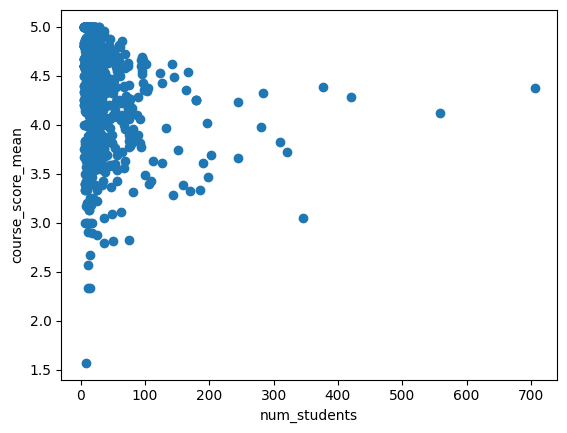

In [14]:
plt.scatter(df['num_students'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('num_students')
plt.ylabel('course_score_mean')
plt.gca().set_facecolor('white')
# Show the plot
plt.show()

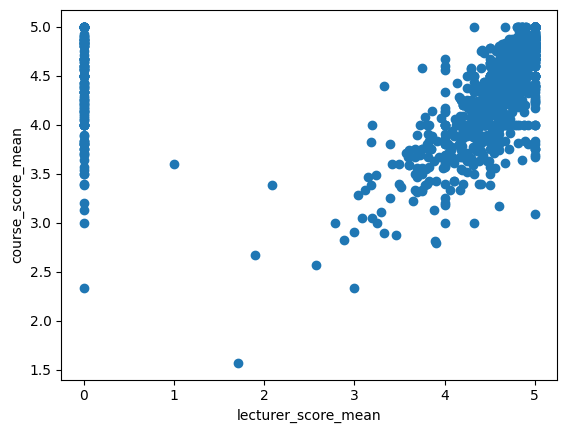

In [15]:
plt.scatter(df['lecturer_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('lecturer_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

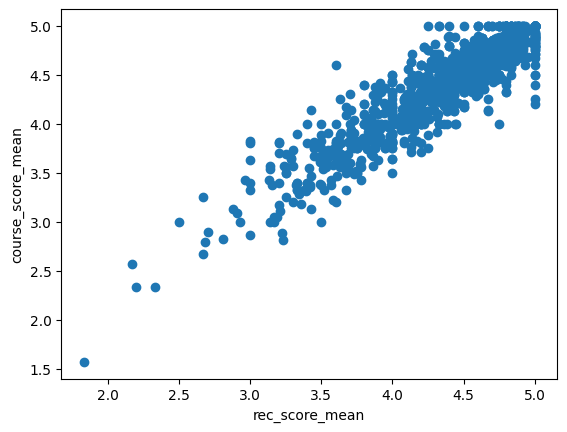

In [16]:
plt.scatter(df['rec_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('rec_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

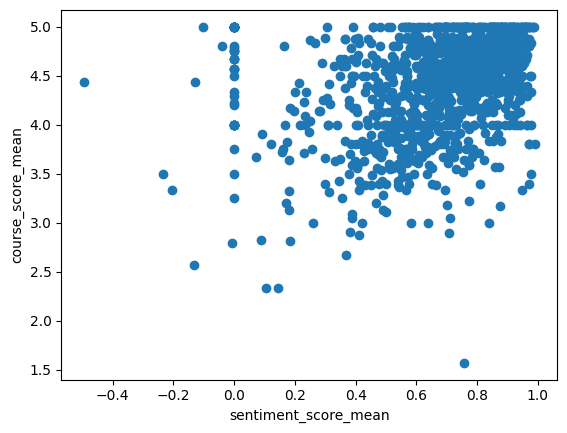

In [17]:
plt.scatter(df['sentiment_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('sentiment_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

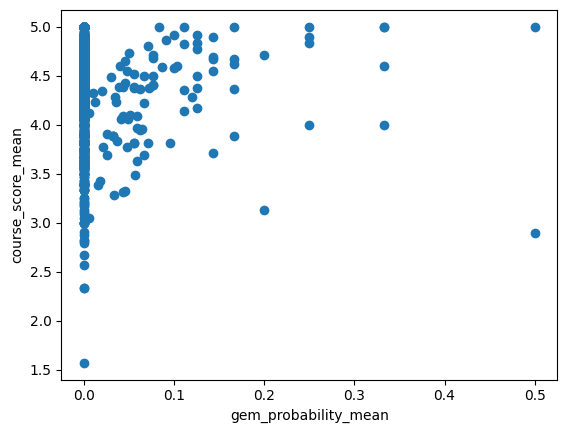

In [18]:
plt.scatter(df['gem_probability_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('gem_probability_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

95


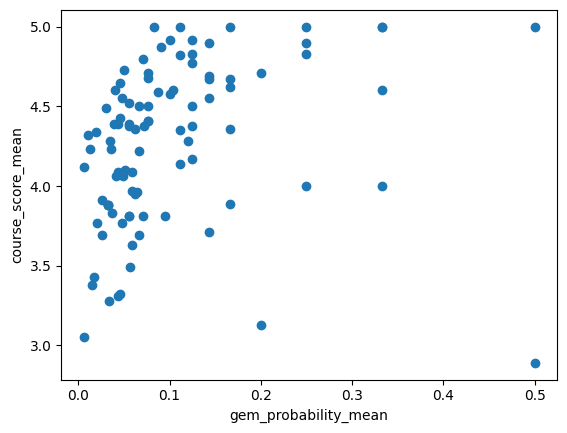

In [19]:
df_course_gem = df[df['gem_probability_mean'] > 0]
df_course_gem = df_course_gem[df_course_gem['gem_probability_mean'] < 1]
print(len(df_course_gem))
plt.scatter(df_course_gem['gem_probability_mean'], df_course_gem['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('gem_probability_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

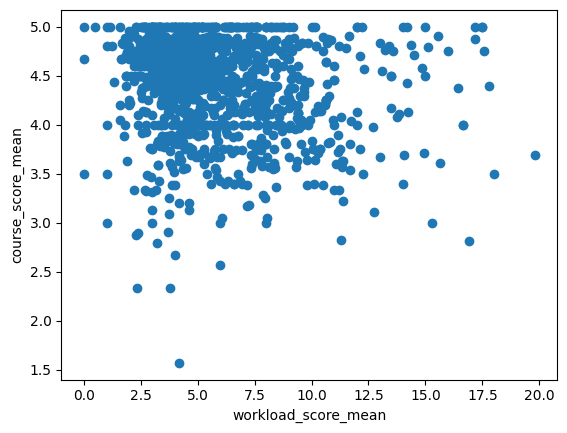

In [20]:
plt.scatter(df['workload_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('workload_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

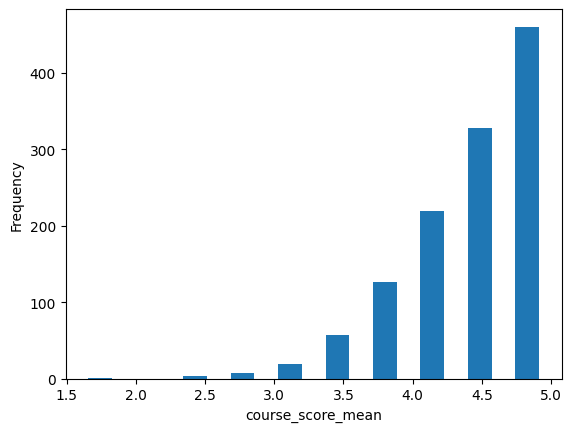

In [21]:
plt.hist(df['course_score_mean'], rwidth=.5)

# Add x-axis and y-axis labels
plt.xlabel('course_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

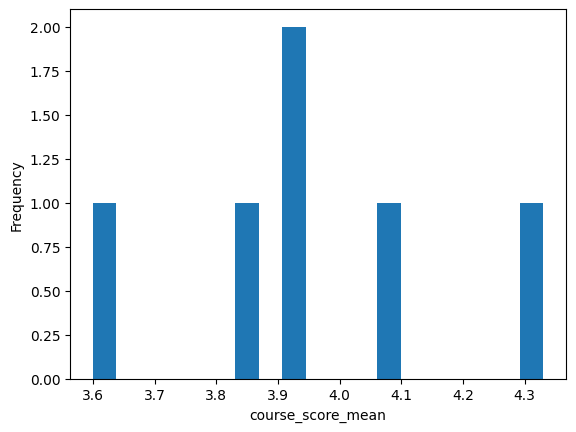

,course_code,course_title,course_score_mean,workload_score_mean
63,APMTH 120,Applied Linear Algebra and Big Data 001,4.35,7.94
57,APMTH 50,Introduction to Applied Mathematics 001,4.09,4.91
59,APMTH 105,Ordinary and Partial Differential Equations 001,3.96,9.27
61,APMTH 108,Nonlinear Dynamical Systems 001,3.94,8.71
62,APMTH 115,Mathematical Modeling 001,3.88,6.79
60,APMTH 107,Graph Theory and Combinatorics 001,3.58,7.83


In [22]:
plt.hist(df['course_score_mean'][df['department']=="Applied Mathematics"], rwidth=.5)

# Add x-axis and y-axis labels
plt.xlabel('course_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

df[df['department']=="Applied Mathematics"][[
"course_code",
    "course_title",
    "course_score_mean",
    "workload_score_mean"
]].sort_values(by=['course_score_mean'],ascending=False)

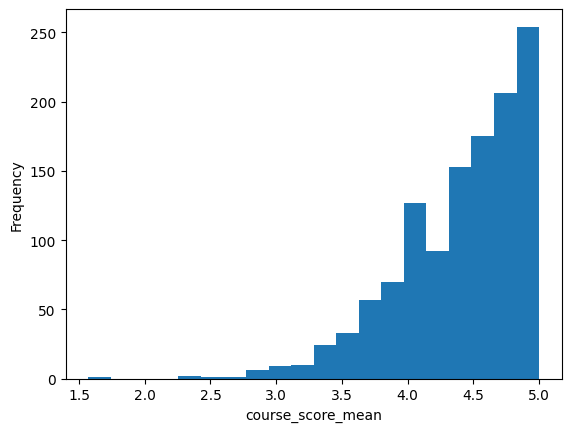

In [23]:
plt.hist(df['course_score_mean'],bins=20)

# Add x-axis and y-axis labels
plt.xlabel('course_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

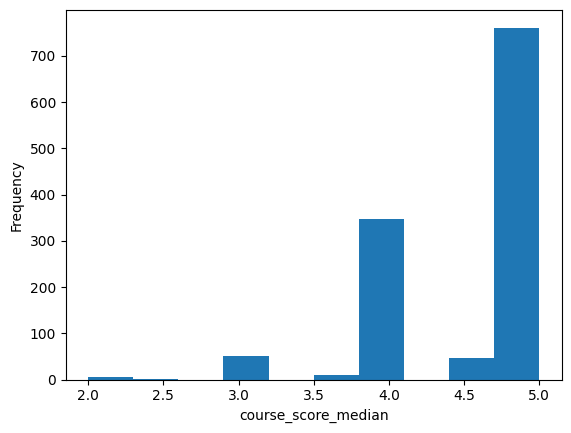

In [24]:
plt.hist(df['course_score_median'])

# Add x-axis and y-axis labels
plt.xlabel('course_score_median')
plt.ylabel('Frequency')

# Show the plot
plt.show()

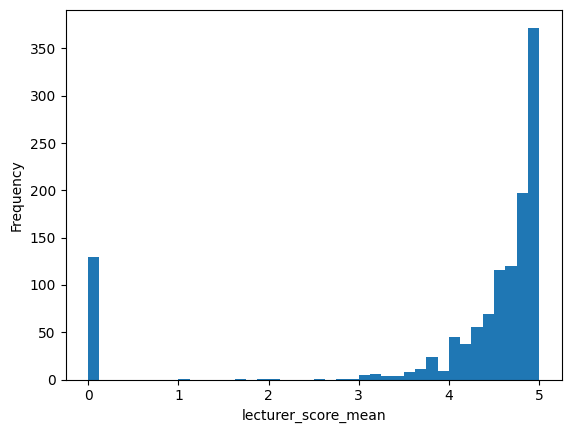

In [25]:
plt.hist(df['lecturer_score_mean'],bins=40)

# Add x-axis and y-axis labels
plt.xlabel('lecturer_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

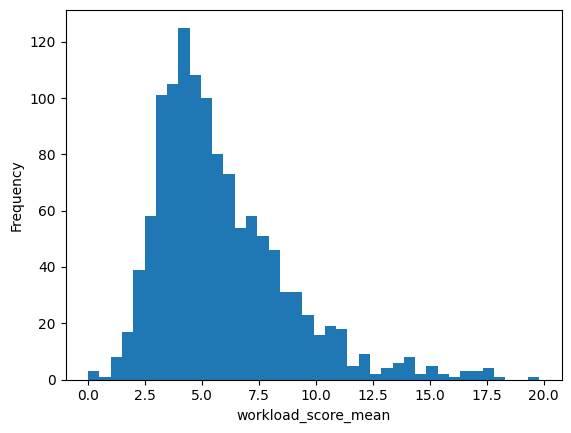

In [26]:
plt.hist(df['workload_score_mean'],bins=40)

# Add x-axis and y-axis labels
plt.xlabel('workload_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [27]:
df['num_students'].describe()

count    1221.000000
mean       26.398853
std        43.894123
min         5.000000
25%        10.000000
50%        15.000000
75%        25.000000
max       706.000000
Name: num_students, dtype: float64

In [28]:
import numpy

df_super_gem = df[(df['course_score_median'] == 5)
& (df['lecturer_score_median'] == 5)
& (df['rec_score_median'] == 5)
& (df['gem_probability_mean'] > 0)
& (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
& (df['course_id'] != '-1')
& (df['course_level'] != 'Graduate Course')
]

print(len(df_super_gem))
df_super_gem = df_super_gem.sort_values(by=['gem_probability_mean'],ascending=False)
df_super_gem

16


,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_probability,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
172,COMPLIT 100,Contemporary Southeast Asia through Literature...,Lienau,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-222897-2242-1-1-SEM,FAS-222897-2242-1-1-SEM(Lienau),8.0,10.0,4.71,5.0,5.0,0.456048,5.00,5.0,5.0,0.000000,4.71,4.0,4.0,1.80,4.57,5.0,5.0,0.53,0.951460,0.97010,0.9361,0.037078,0.200000,0.0,0.0,0.447214,This is a great course for those truly passion...,0.9826,NaN,0.0000,This is a great course for those truly passion...,0.9826,222897,For Undergraduate and Graduate Students,Comparative Literature,Comparative Literature,NaN,Arts and Humanities,NaN,Seminar,Contemporary Southeast Asia through Literature...,COMPLIT 100 Contemporary Southeast Asia throug...,It is a true gem in the comparative literature...,Contemporary Southeast Asia through Literature...,This is a great course for those truly passion...,This is a great course for those truly passion...
550,EXPOS 20,Expository Writing 20 206,Brown,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2242-1-1-206,FAS-116353-2242-1-1-206(Brown),13.0,15.0,4.38,5.0,5.0,0.737111,4.83,5.0,5.0,0.377525,3.82,4.0,4.0,1.08,4.33,5.0,5.0,0.98,0.887450,0.92380,0.9343,0.107155,0.125000,0.0,0.0,0.353553,Dr. Brown IS THE BEST! GOAT GOAT GOAT GOAT. I ...,0.9763,NaN,0.0000,its expos! so its a little dull. but professor...,0.6701,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 206,"but professor brown is really really nice, and...",Expository Writing 20 206,"He is very interesting, engaging, and kind.",Dr. Brown IS THE BEST!
619,EXPOS 40,Public Speaking Practicum 008,Montano,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-125227-2242-1-1-008,FAS-125227-2242-1-1-008(Montano),14.0,15.0,4.92,5.0,5.0,0.272660,4.85,5.0,5.0,0.358870,4.08,4.0,4.0,1.75,4.92,5.0,5.0,0.28,0.863575,0.91260,0.9401,0.150169,0.125000,0.0,0.0,0.353553,"Time spent per week2.5, 2, 4, 5, 2.5, 1.5, 2.5...",0.9896,NaN,0.0000,"Time spent per week2.5, 2, 4, 5, 2.5, 1.5, 2.5...",0.9896,125227,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Lecture,Public Speaking Practicum,EXPOS 40 Public Speaking Practicum 008,Start practicing the speech instead of keep ed...,Public Speaking Practicum,Some are hilarious to sit through.There are so...,"Time spent per week2.5, 2, 4, 5, 2.5, 1.5, 2.5..."
858,HISTSCI 1684,"Race, War, and Medicine 001",Robinson,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-223101-2242-1-1-001,FAS-223101-2242-1-1-001(Robinson),14.0,17.0,4.77,5.0,5.0,0.585637,4.85,5.0,5.0,0.358870,5.33,5.0,4.0,2.02,4.77,5.0,5.0,0.60,0.878437,0.94445,0.8682,0.192948,0.125000,0.0,0.0,0.353553,"In short, TAKE THIS CLASS.This was by far my f...",0.9873,NaN,0.0000,"In short, TAKE THIS CLASS.This was by far my f...",0.9873,223101,For Undergraduate and Graduate Students,History of Science,History of Science,NaN,Social Sciences,NaN,Lecture,"Race, War, and Medicine","HISTSCI 1684 Race, War, and Medicine 001",Les is such an amazing instructor and is reall...,"Race, War, and Medicine","The readings are not only interesting, but th

In [29]:
df_super_gem = df_super_gem[df_super_gem['course_code'] != 'EXPOS 20']
df_super_gem

,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_probability,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
172,COMPLIT 100,Contemporary Southeast Asia through Literature...,Lienau,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-222897-2242-1-1-SEM,FAS-222897-2242-1-1-SEM(Lienau),8.0,10.0,4.71,5.0,5.0,0.456048,5.00,5.0,5.0,0.000000,4.71,4.0,4.0,1.80,4.57,5.0,5.0,0.53,0.951460,0.97010,0.9361,0.037078,0.200000,0.0,0.0,0.447214,This is a great course for those truly passion...,0.9826,NaN,0.0000,This is a great course for those truly passion...,0.9826,222897,For Undergraduate and Graduate Students,Comparative Literature,Comparative Literature,NaN,Arts and Humanities,NaN,Seminar,Contemporary Southeast Asia through Literature...,COMPLIT 100 Contemporary Southeast Asia throug...,It is a true gem in the comparative literature...,Contemporary Southeast Asia through Literature...,This is a great course for those truly passion...,This is a great course for those truly passion...
619,EXPOS 40,Public Speaking Practicum 008,Montano,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-125227-2242-1-1-008,FAS-125227-2242-1-1-008(Montano),14.0,15.0,4.92,5.0,5.0,0.272660,4.85,5.0,5.0,0.358870,4.08,4.0,4.0,1.75,4.92,5.0,5.0,0.28,0.863575,0.91260,0.9401,0.150169,0.125000,0.0,0.0,0.353553,"Time spent per week2.5, 2, 4, 5, 2.5, 1.5, 2.5...",0.9896,NaN,0.0000,"Time spent per week2.5, 2, 4, 5, 2.5, 1.5, 2.5...",0.9896,125227,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Lecture,Public Speaking Practicum,EXPOS 40 Public Speaking Practicum 008,Start practicing the speech instead of keep ed...,Public Speaking Practicum,Some are hilarious to sit through.There are so...,"Time spent per week2.5, 2, 4, 5, 2.5, 1.5, 2.5..."
858,HISTSCI 1684,"Race, War, and Medicine 001",Robinson,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-223101-2242-1-1-001,FAS-223101-2242-1-1-001(Robinson),14.0,17.0,4.77,5.0,5.0,0.585637,4.85,5.0,5.0,0.358870,5.33,5.0,4.0,2.02,4.77,5.0,5.0,0.60,0.878437,0.94445,0.8682,0.192948,0.125000,0.0,0.0,0.353553,"In short, TAKE THIS CLASS.This was by far my f...",0.9873,NaN,0.0000,"In short, TAKE THIS CLASS.This was by far my f...",0.9873,223101,For Undergraduate and Graduate Students,History of Science,History of Science,NaN,Social Sciences,NaN,Lecture,"Race, War, and Medicine","HISTSCI 1684 Race, War, and Medicine 001",Les is such an amazing instructor and is reall...,"Race, War, and Medicine","The readings are not only interesting, but the...","In short, TAKE THIS CLASS.This was by far my f..."
220,COMPSCI 196,Designing K–12 Computer Science Learning Exper...,Brennan,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-221939-2242-1-1-001,FAS-221939-2242-1-1-001(Brennan),14.0,17.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,4.62,4.0,4.0,1.50,5.00,5.0,5.0,0.00,0.786844,0.97970,0.9970,0.558998,0.111111,0.0,0.0,0.333333,TAKE THIS CLASS!!!! I don't usually write long...,0.9970,You should absolutely take this course!! It is...,-0.7021,GUARANTEED ***A*** FOR YOUR GPA. That's entire...,0.9894,221939,For Undergraduate and Graduate Students,Computer Science,Computer Science,NaN,Science & Engineering & Applied Science,NaN,Lecture,Designing K–12 Computer Science Le

In [30]:
df_super_gem[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_probability_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'course_id',
    'link'
]].to_json('output_data/super_gems.json',orient='records')

In [31]:
department_list = [x for x in df['department'].unique() if str(x)!='nan']
department_list.sort()
import json
with open('output_data/department_list.json', "w") as f:
    json.dump(department_list, f)
department_list

['African & African Amer Studies',
 'Anthropology',
 'Applied Computation',
 'Applied Mathematics',
 'Applied Physics',
 'Art, Film, and Visual Studies',
 'Astronomy',
 'Bio Sciences in Public Health',
 'Biophysics',
 'Biostatistics',
 'Chemical & Physical Biology',
 'Chemistry & Chemical Biology',
 'Classics, The',
 'Comparative Literature',
 'Computer Science',
 'Earth & Planetary Sciences',
 'East Asian Langs & Civ',
 'Economics',
 'Education Studies',
 'Engineering Sciences',
 'English',
 'Envi Science & Public Policy',
 'Environmental Sci & Engineer',
 'Ethnicity, Migration, Rights',
 'Expository Writing',
 'First Year Seminar Program',
 'Folklore & Mythology',
 'General Education',
 'Germanic Languages & Lit',
 'Global Health & Health Policy',
 'Government',
 'Health Policy',
 'History',
 'History & Literature',
 'History of Art & Architecture',
 'History of Science',
 'Human Evolutionary Biology',
 'Humanities',
 'Linguistics',
 'Mathematics',
 'Medical Sciences',
 'Medieval Stu

In [32]:
def get_gems_of_department(department):
  df_gem_of_department = df[
     (df['department'] == department)
  & (df['gem_probability_mean'] > 0)
  & (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
  & (df['workload_score_mean'] < 7)
  & (df['course_id'] != '-1')
    & (df['course_level'] != 'Graduate Course')
  ]

  df_gem_of_department = df_gem_of_department.sort_values(by=['gem_probability_mean'],ascending=False).head(5)
  df_gem_of_department[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_probability_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'course_id',
    'link'
  ]].to_json('departments/'+department+'.json',orient='records')

In [33]:
for department in department_list:
  get_gems_of_department(department)

In [34]:
df[df['department'] == 'Expository Writing']

,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_probability,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
545,EXPOS 20,Expository Writing 20 201,Alqera,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2242-1-1-201,FAS-116353-2242-1-1-201(Alqera),15.0,15.0,4.53,5.0,5.0,0.716614,4.57,5.0,5.0,0.623691,3.79,4.0,4.0,0.89,4.60,5.0,5.0,0.63,0.844445,0.95480,0.9506,0.290741,0.000,0.0,0.0,0.000000,This class was a good take. We learned about m...,0.9951,NaN,0.0000,,0.0000,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 201,,Expository Writing 20 201,"I found this interesting content, but also sup...",This class was a good take.
546,EXPOS 20,Expository Writing 20 202,Alqera,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2242-1-1-202,FAS-116353-2242-1-1-202(Alqera),15.0,15.0,4.07,4.0,5.0,1.060589,4.29,4.5,5.0,0.795124,3.50,3.5,3.0,1.40,4.21,4.0,4.0,0.89,0.918756,0.92710,0.8673,0.043491,0.000,0.0,0.0,0.000000,Sheza is a kind and inclusive instructor who m...,0.9866,NaN,0.0000,,0.0000,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 202,,Expository Writing 20 202,She is very well–informed and passionate on th...,Sheza is a kind and inclusive instructor who m...
547,EXPOS 20,Expository Writing 20 203,Baca,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2242-1-1-203,FAS-116353-2242-1-1-203(Baca),14.0,15.0,4.38,5.0,5.0,0.936499,4.69,5.0,5.0,0.614554,5.15,5.0,6.0,1.41,4.46,5.0,5.0,0.88,0.665467,0.89910,0.9975,0.451774,0.000,0.0,0.0,0.000000,HIGHLY RECOMMEND THIS EXPOS CLASS! Dr. B is se...,0.9975,This course shares the same harsh grading as a...,-0.1901,,0.0000,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 203,,Expository Writing 20 203,"Still, assignment prompts are pretty flexible ...",HIGHLY RECOMMEND THIS EXPOS CLASS!
548,EXPOS 20,Expository Writing 20 204,Bafford,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2242-1-1-204,FAS-116353-2242-1-1-204(Bafford),14.0,15.0,4.00,4.0,5.0,0.969171,4.69,5.0,5.0,0.464823,5.08,5.0,5.0,2.02,4.00,4.0,5.0,1.04,0.870311,0.82450,0.7645,0.097397,0.000,0.0,0.0,0.000000,I went into this class thinking this was just ...,0.9947,NaN,0.0000,,0.0000,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 204,,Expository Writing 20 204,I went into this class thinking this was just ...,I went into this class thinking this was just ...
549,EXPOS 20,Expository Writing 20 205,Bafford,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2242-1-1-205,FAS-116353-2242-1-1-205(Bafford),13.0,14.0,4.18,4.0,4.0,0.575247,4.82,5.0,5.0,0.386123,5.09,5.0,5.0,1.51,4.36,4.0,4.0,0.67,0.670167,0.81415,0.9099,0.373416,0.000,0.0,0.0,0.000000,Professor Bafford is an excellent writer and i...,0.9592,NaN,0.0000,,0.0000,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expositor

In [35]:
print(len(df[df['course_id']!='-1']))

585


In [36]:
print(len(df[
    (df['course_id']!='-1')
    &(df['gem_probability_mean']>0)
]))

43


In [37]:
df_great_courses = df[(df['course_score_median'] == 5)
& (df['lecturer_score_median'] == 5)
& (df['rec_score_median'] == 5)
& (df['gem_probability_mean'] <= 0)
& (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
& (df['course_id'] != '-1')
& (df['workload_score_mean'] > 4)
& (df['course_level'] != 'Graduate Course')
]

print(len(df_great_courses))
df_great_courses = df_great_courses.sort_values(by=['course_score_mean'],ascending=False)

df_great_courses[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_probability_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'best_comment',
    'best_comment_short',
    'best_comment_first',
    'course_id',
    'link'
  ]].to_json('output_data/great_courses.json',orient='records')
df_great_courses

124


,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_probability,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
496,ENGLISH 98R,Tutorial - Junior Year 005,Hitt,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-113443-2242-1-1-005,FAS-113443-2242-1-1-005(Hitt),5.0,5.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,8.00,7.0,12.0,2.92,5.00,5.0,5.0,0.00,0.975050,0.97505,0.9911,0.022698,0.0,0.0,0.0,0.0,This is an incredible class! TAKE IT! Elinor i...,0.9911,NaN,0.0000,,0.0,113443,Primarily for Undergraduate Students,English,English,NaN,Arts and Humanities,NaN,Tutorial,Tutorial - Junior Year,ENGLISH 98R Tutorial - Junior Year 005,,Tutorial - Junior Year,"It was wonderful to read such amazing novels, ...",This is an incredible class!
294,JAPAN 140B,Advanced Modern Japanese 001,Asakura,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-123963-2242-1-1-001,FAS-123963-2242-1-1-001(Asakura),8.0,10.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,6.43,6.0,8.0,2.37,4.75,5.0,5.0,0.71,0.881200,0.89560,0.8956,0.050562,0.0,0.0,0.0,0.0,"Like all language classes, Japanese takes a go...",0.9230,NaN,0.0000,,0.0,123963,For Undergraduate and Graduate Students,East Asian Langs & Civ,Japanese,NaN,Arts and Humanities,NaN,Lecture,Advanced Modern Japanese,JAPAN 140B Advanced Modern Japanese 001,,Advanced Modern Japanese,"Like all language classes, Japanese takes a go...","Like all language classes, Japanese takes a go..."
1367,PSY 1325,"The Emotional, Social Brain 001",Phelps,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-216792-2242-1-1-001,FAS-216792-2242-1-1-001(Phelps),15.0,17.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,4.10,4.0,4.0,1.52,5.00,5.0,5.0,0.00,0.700340,0.62390,0.5494,0.243248,0.0,0.0,0.0,0.0,The papers we read were difficult to understan...,0.9864,NaN,0.0000,,0.0,216792,For Undergraduate and Graduate Students,Psychology,Psychology,NaN,Science & Engineering & Applied Science,NaN,Seminar,"The Emotional, Social Brain","PSY 1325 The Emotional, Social Brain 001",,"The Emotional, Social Brain","But, Dr. Phelps is great at supporting her stu...",The papers we read were difficult to understan...
380,ECON 2003,Computing for Economists 001,Shapiro,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-223960-2242-1-1-001,FAS-223960-2242-1-1-001(Shapiro),22.0,29.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,-1.00,5.00,5.0,5.0,0.00,0.669600,0.66960,0.6696,-1.000000,0.0,0.0,0.0,-1.0,Toren and Ruby are the best!,0.6696,NaN,0.0000,,0.0,223960,Primarily for Graduate Students,Economics,Economics,NaN,Social Sciences,NaN,Lecture,Computing for Economists,ECON 2003 Computing for Economists 001,,Computing for Economists,Toren and Ruby are the best!,Toren and Ruby are the best!
1286,PHIL 156,Philosophy of Mind 001,Nichols,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-113339-2242-1-1-001,FAS-113339-2242-1-1-001(Nichols),17.0,21.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,5.77,4.0,5.0,4.68,4.93,5.0,5.0,0.27,0.823433,0.92720,0.9313,0.240894,0.0,0.0,0.0,0.0,9/10This is a fantastic class. You will need a...,0.9751,NaN,0.0000,,0.0,113339,For Undergraduate and Graduate Students,Philosophy,Philosophy,NaN,Arts and Humanities,NaN,Lecture,Philosophy of Mind,PHIL 156 Philosophy of Mind 001,,Philosophy of Mind,

In [38]:
df_hidden_gems = df[(df['course_score_median'] == 5)
& (df['lecturer_score_median'] == 5)
& (df['rec_score_median'] == 5)
& (df['gem_probability_mean'] <= 0)
& (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
& (df['course_id'] != '-1')
& (df['workload_score_mean'] <= 4)
& (df['course_level'] != 'Graduate Course')
]

print(len(df_hidden_gems))
df_hidden_gems = df_hidden_gems.sort_values(by=['workload_score_mean'],ascending=True)

df_hidden_gems[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_probability_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'best_comment',
    'best_comment_short',
    'best_comment_first',
    'course_id',
    'link'
  ]].to_json('output_data/hidden_gems.json',orient='records')
df_hidden_gems

59


,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_probability,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
630,FYSEMR 52E,Science and Technology Primer for Future Leade...,Park,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-216105-2242-1-1-001,FAS-216105-2242-1-1-001(Park),8.0,9.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,1.57,2.0,2.0,0.98,5.00,5.0,5.0,0.00,0.857675,0.92320,0.8689,0.195570,0.0,0.0,0.0,0.0,I really enjoyed this class!!! The seminars we...,0.9981,NaN,0.0000,,0.0,216105,Primarily for Undergraduate Students,First Year Seminar Program,First Year Seminar,NaN,None,NaN,Seminar,Science and Technology Primer for Future Leaders,FYSEMR 52E Science and Technology Primer for F...,,Science and Technology Primer for Future Leaders,He had so many cool stories and experiences to...,I really enjoyed this class!!!
625,FYSEMR 24U,“How Did I Get Here?”—Appreciating “Normal” Ch...,Prager,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-128122-2242-1-1-001,FAS-128122-2242-1-1-001(Prager),9.0,11.0,4.67,5.0,5.0,0.472582,5.00,5.0,5.0,0.000000,1.63,1.0,1.0,1.19,4.67,5.0,5.0,0.50,0.946275,0.96315,0.8625,0.041842,0.0,0.0,0.0,0.0,This is a very informative and lovely course t...,0.9876,NaN,0.0000,,0.0,128122,Primarily for Undergraduate Students,First Year Seminar Program,First Year Seminar,NaN,None,NaN,Seminar,“How Did I Get Here?”—Appreciating “Normal” Ch...,FYSEMR 24U “How Did I Get Here?”—Appreciating ...,,“How Did I Get Here?”—Appreciating “Normal” Ch...,The assignments are very fun and not terribly ...,This is a very informative and lovely course t...
1164,MUSIC 15,Harvard Glee Club 001,Jones,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-110115-2242-1-1-001,FAS-110115-2242-1-1-001(Jones),32.0,37.0,4.96,5.0,5.0,0.196946,4.83,5.0,5.0,0.617881,2.00,0.5,0.0,2.96,4.96,5.0,5.0,0.20,0.750700,0.78865,0.8061,0.202125,0.0,0.0,0.0,0.0,Take Glee Club if you enjoy Tenor and Bass cho...,0.9360,NaN,0.0000,,0.0,110115,Primarily for Undergraduate Students,Music,Music,NaN,None,NaN,Studio,Harvard Glee Club,MUSIC 15 Harvard Glee Club 001,,Harvard Glee Club,Take Glee Club if you enjoy Tenor and Bass cho...,Take Glee Club if you enjoy Tenor and Bass cho...
697,SCAND 55,One Hundred Years of Scandinavian Cinema 1,Broome,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-159715-2242-1-1-1,FAS-159715-2242-1-1-1(Broome),17.0,21.0,4.73,5.0,5.0,0.446196,4.91,5.0,5.0,0.287623,2.00,2.0,2.0,1.00,4.82,5.0,5.0,0.40,0.676350,0.86865,0.9197,0.455243,0.0,0.0,0.0,0.0,This is one of the best courses I've ever take...,0.9681,NaN,0.0000,,0.0,159715,Primarily for Undergraduate Students,Germanic Languages & Lit,Scandinavian,NaN,Arts and Humanities,NaN,Lecture,One Hundred Years of Scandinavian Cinema,SCAND 55 One Hundred Years of Scandinavian Cin...,,One Hundred Years of Scandinavian Cinema,Dr. Broome is fantastic and so friendly in the...,This is one of the best courses I've ever taken.
1163,MUSIC 14,Harvard-Radcliffe Collegium Musicum 001,Horn,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-110114-2242-1-1-001,FAS-110114-2242-1-1-001(Horn),22.0,28.0,4.89,5.0,5.0,0.314466,4.83,5.0,5.0,0.517611,2.00,1.5,1.0,1.75,4.84,5.0,5.0,0.37,0.738990,0.84275,0.9507,0.306260,0.0,0.0,0.0,0.0,so much joy and passion fills this e